# Preparing the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

dataset_path="/content/drive/My Drive/Colab Notebooks/Clustering/clustering-dataset.csv"
X=pd.read_csv(dataset_path,delimiter=";").to_numpy()

ground_truth_path="/content/drive/My Drive/Colab Notebooks/Clustering/ground-truth.txt"
ground_truth_file=open(ground_truth_path,"r")
ground_truth_text = ground_truth_file.read()
y=np.array(ground_truth_text.split())
y=[ int(x) for x in y ]
ground_truth_file.close()

Let's plot the dataset to see how data is distribuited

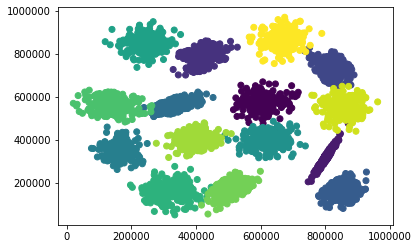

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# KMeans
Let's first check the performance sklearn's implementation of the KMeans algorithm

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=69).fit(X)

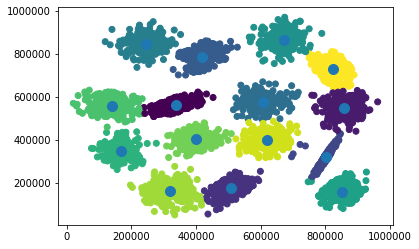

0.9867990399515725


In [5]:
from sklearn import metrics

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="o",s=100)

plt.show()

print(metrics.adjusted_rand_score(y, kmeans.labels_))

Let's now define our implementation

In [0]:
import sys

def KMeans(X, n_cluster,delta):
    #Let's pick n different examples as the starting centroids
    np.random.seed(69)
    centroids=X[np.random.choice(X.shape[0], n_cluster, replace=False)]

    examples_assigments=[]
    cicle_difference=None
    #We repeat the algorithm until the euclidean difference between the new centroids and previous one is small enough
    while cicle_difference==None or cicle_difference>delta:
        examples_assigments=[]
        #We assign each point to the closest centroid
        for point in X:
            best_cluster=None
            best_similarity=None
            for i in range(0,n_cluster):
                current_similarity=np.linalg.norm(point-centroids[i,:])
                if best_similarity==None or current_similarity<best_similarity:
                    best_cluster=i
                    best_similarity=current_similarity
            examples_assigments.append(best_cluster)
        new_centroids=np.zeros((n_cluster,X.shape[1]))
        n_cluster_assignments=[0 for i in range(0,n_cluster)]
        #We calculate the new centroids as the mean of all the points assigned to the relative cluster
        i=0
        for assigment in examples_assigments:
            new_centroids[assigment,:]=new_centroids[assigment,:]+X[i,:]
            n_cluster_assignments[assigment]=n_cluster_assignments[assigment]+1
            i=i+1
        for i in range(0,len(new_centroids)):
            new_centroids[i,:]=new_centroids[i,:]/n_cluster_assignments[i]
        cicle_difference=np.linalg.norm(new_centroids-centroids)
        sys.stdout.write("\r Current delta between cycles is %d" % (cicle_difference))
        centroids=new_centroids
    return examples_assigments, centroids

Let's check how it performs

In [7]:
clusterization,centroids=KMeans(X,15,1)

 Current delta between cycles is 0

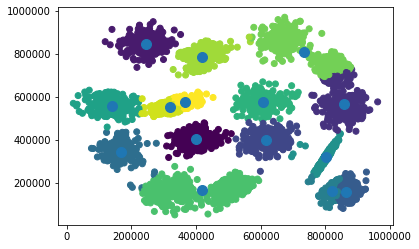

0.8170314626329931

In [8]:
plt.scatter(X[:,0],X[:,1],c=clusterization)
plt.scatter(centroids[:,0],centroids[:,1],marker="o",s=100)

plt.show()

metrics.adjusted_rand_score(y, clusterization)

The results obtained are pretty decent